<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/09_daum_site(240830).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 웹에 있는 데이터를 수집을 하는 것!!!!
# 1) API : 메뉴얼을 잘 살펴보고, 정의된 사항대로 요청하고 받음!
# 2) 일반적인 사이트
#    2-1) 전자공시사이트 : 숨겨진 주소만 잘 찾아서 하면 됨!!!
#                          다만, 속도나 그 쪽에서 방어할 수는 있음.
#    2-2) daum --> 금융  : 숨겨진 주소를 찾아도 안 되는 경우도 있음..
#                        : 웹브라우저에서는 되는데,,파이썬 코드상 안 될때
#                          ==> 코드가 아니라 웹브라우저인 것 처럼
#                              user-agent : 접속하는 sw의 정보
#                              referer : 해당 주소에 대한 정보를
#                                        부를 대상이 지정해서 사용!
#                              etc : cookies etc
############################################################
# (+++) 웹드라이버 : 직접 브라우저를 컨트롤 해서 접근!!!!
#       --> 패키지 : 셀레니움(단, 느려요;;;;)
#           로그인을 해야하는 사이트에 있어서는
#           웹드라이버랑 코드랑 함께......
# ===> 결론) 정해진 것들은 없음!!!
#            내가 해야하는 사이트에/ api에 맞춰서 해보는 것!
#            사이트마다 다 달라서 직접 & 실험!

In [ ]:
import urllib.request

In [ ]:
url ="https://finance.daum.net/"
res = urllib.request.urlopen(url)
res.read().decode("utf-8")
# 종종 : 403 Forbidden error라고 뜬다

'\n<!DOCTYPE html>\n<html lang="ko" class="os_mac"><head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta property="og:site_name" content="다음금융" />\n<meta property="og:image" content="https://t1.daumcdn.net/media/finance_og.png" />\n<link rel="shortcut icon" href="https://t1.daumcdn.net/top/favicon.ico">\n\n\t<title>다음 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://t1.daumcdn.net/media/kraken/finance/resources/dist/240827160156/commonCSSBundle.merged.css" />\n\n<script src="https://t1.daumcdn.net/media/kraken/finance/resources/dist/240827160156/pcFramework.merged.js"></script>\n\n<script>\n\twindow.REQUEST_URI = \'/home\';\n\twindow.CURRENT_URL = encodeURIComponent(\n\t\t"".concat(\n\t\t\twindow.location.protocol,\n\t\t\t"//",\n\t\t\twindow.location.host,\n\t\t\twindow.location.pathname,\n\t\t\twindow.location.search\n\t\t)\n\t);\n\n\twindow.FINANCE = {};\n\twindow.FINANCE.API_URL

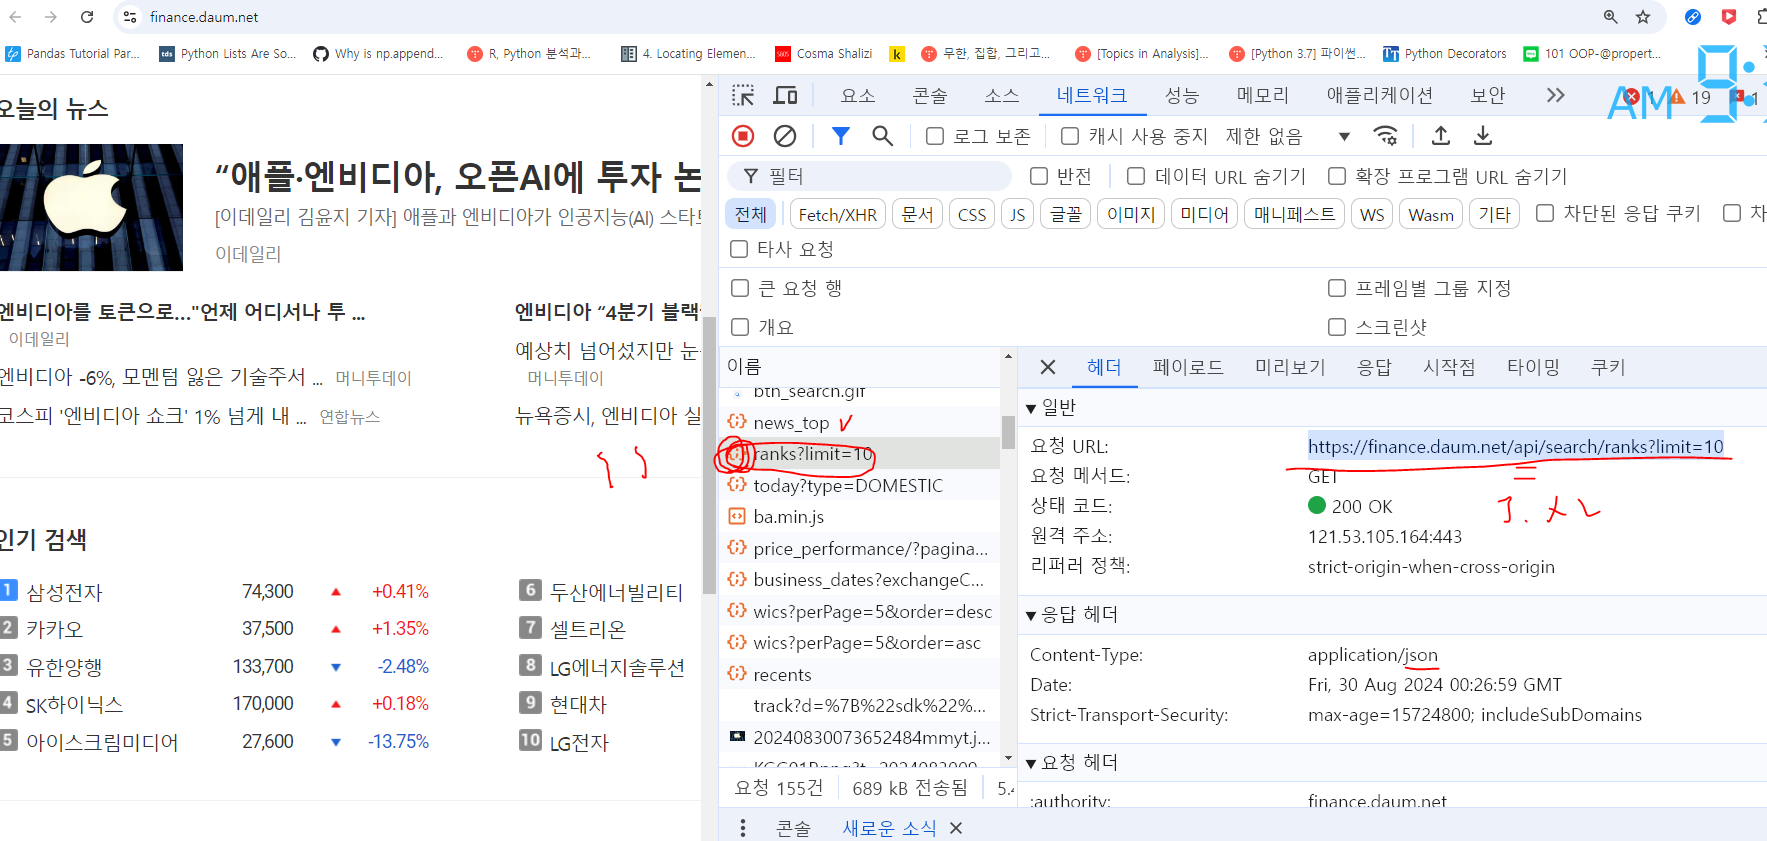

In [ ]:
url = "https://finance.daum.net/api/search/ranks?limit=10"
res = urllib.request.urlopen(url)
res.read().decode("utf-8")

'{\n  "data" : [ {\n    "rank" : 1,\n    "rankChange" : 1,\n    "symbolCode" : "A005930",\n    "shortCode" : "A005930",\n    "code" : "KR7005930003",\n    "name" : "삼성전자",\n    "isNew" : false,\n    "tradePrice" : 74300,\n    "change" : "RISE",\n    "changePrice" : 300,\n    "changeRate" : 0.0040540541,\n    "signedChangeRate" : 0.0040540541,\n    "accTradeVolume" : 2386945,\n    "accTradePrice" : 177555543400,\n    "chartSlideImage" : null,\n    "boardUrl" : "https://finance.daum.net/quotes/A005930#talks"\n  }, {\n    "rank" : 2,\n    "rankChange" : -1,\n    "symbolCode" : "A035720",\n    "shortCode" : "A035720",\n    "code" : "KR7035720002",\n    "name" : "카카오",\n    "isNew" : false,\n    "tradePrice" : 37500,\n    "change" : "RISE",\n    "changePrice" : 500,\n    "changeRate" : 0.0135135135,\n    "signedChangeRate" : 0.0135135135,\n    "accTradeVolume" : 199172,\n    "accTradePrice" : 7443587200,\n    "chartSlideImage" : null,\n    "boardUrl" : "https://finance.daum.net/quotes/A0357

In [ ]:
#-->403에러나 접근 권한 없어요..에러가 발생하면 간단하게는 내가 브라우저에요 user-agent
#   간단하게는  내가 브라우저에요!!user-agent
#   내가 직접 호출한 것이 아니라 특정사이트 호출한거에요 refer

In [ ]:
url = "https://finance.daum.net/api/search/ranks?limit=10"
# 부가적인 정보를 바탕으로 요청을 해보기!!!!!!
req = urllib.request.Request(
    url,
    data = None,
    headers = {"referer" : "https://finance.daum.net/",
              "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"}
)
# ==> 브라우저가 요청했던 실질적인 주소에 대해서 다 완성!!!
res = urllib.request.urlopen(req ).read().decode("utf-8")
res

'{\n  "data" : [ {\n    "rank" : 1,\n    "rankChange" : 1,\n    "symbolCode" : "A005930",\n    "shortCode" : "A005930",\n    "code" : "KR7005930003",\n    "name" : "삼성전자",\n    "isNew" : false,\n    "tradePrice" : 74700,\n    "change" : "RISE",\n    "changePrice" : 700,\n    "changeRate" : 0.0094594595,\n    "signedChangeRate" : 0.0094594595,\n    "accTradeVolume" : 2790258,\n    "accTradePrice" : 207586067300,\n    "chartSlideImage" : null,\n    "boardUrl" : "https://finance.daum.net/quotes/A005930#talks"\n  }, {\n    "rank" : 2,\n    "rankChange" : -1,\n    "symbolCode" : "A035720",\n    "shortCode" : "A035720",\n    "code" : "KR7035720002",\n    "name" : "카카오",\n    "isNew" : false,\n    "tradePrice" : 37400,\n    "change" : "RISE",\n    "changePrice" : 400,\n    "changeRate" : 0.0108108108,\n    "signedChangeRate" : 0.0108108108,\n    "accTradeVolume" : 223355,\n    "accTradePrice" : 8349967900,\n    "chartSlideImage" : null,\n    "boardUrl" : "https://finance.daum.net/quotes/A0357

In [ ]:
url = "https://finance.daum.net/api/search/ranks?limit=10"
headers = {"referer" : "https://finance.daum.net/",
              "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"}
res = requests.get(url,headers=headers)   #위의 user-agent는 나는 일반사용자가 아니고 홈페이지라고 속이는 방법이다.
temp = res.text                           #referer가 정확히 무슨 뜻인지 찾아보기
temp

'{\n  "data" : [ {\n    "rank" : 1,\n    "rankChange" : 1,\n    "symbolCode" : "A005930",\n    "shortCode" : "A005930",\n    "code" : "KR7005930003",\n    "name" : "삼성전자",\n    "isNew" : false,\n    "tradePrice" : 74700,\n    "change" : "RISE",\n    "changePrice" : 700,\n    "changeRate" : 0.0094594595,\n    "signedChangeRate" : 0.0094594595,\n    "accTradeVolume" : 2881125,\n    "accTradePrice" : 214372364000,\n    "chartSlideImage" : null,\n    "boardUrl" : "https://finance.daum.net/quotes/A005930#talks"\n  }, {\n    "rank" : 2,\n    "rankChange" : -1,\n    "symbolCode" : "A035720",\n    "shortCode" : "A035720",\n    "code" : "KR7035720002",\n    "name" : "카카오",\n    "isNew" : false,\n    "tradePrice" : 37400,\n    "change" : "RISE",\n    "changePrice" : 400,\n    "changeRate" : 0.0108108108,\n    "signedChangeRate" : 0.0108108108,\n    "accTradeVolume" : 231507,\n    "accTradePrice" : 8654779300,\n    "chartSlideImage" : null,\n    "boardUrl" : "https://finance.daum.net/quotes/A0357

In [ ]:
# ==> requests  패키지는 직접적으로 json 을 변환해주는 메서드
temp = res.json()
temp

{'data': [{'rank': 1,
   'rankChange': 1,
   'symbolCode': 'A005930',
   'shortCode': 'A005930',
   'code': 'KR7005930003',
   'name': '삼성전자',
   'isNew': False,
   'tradePrice': 74700,
   'change': 'RISE',
   'changePrice': 700,
   'changeRate': 0.0094594595,
   'signedChangeRate': 0.0094594595,
   'accTradeVolume': 2881125,
   'accTradePrice': 214372364000,
   'chartSlideImage': None,
   'boardUrl': 'https://finance.daum.net/quotes/A005930#talks'},
  {'rank': 2,
   'rankChange': -1,
   'symbolCode': 'A035720',
   'shortCode': 'A035720',
   'code': 'KR7035720002',
   'name': '카카오',
   'isNew': False,
   'tradePrice': 37400,
   'change': 'RISE',
   'changePrice': 400,
   'changeRate': 0.0108108108,
   'signedChangeRate': 0.0108108108,
   'accTradeVolume': 231507,
   'accTradePrice': 8654779300,
   'chartSlideImage': None,
   'boardUrl': 'https://finance.daum.net/quotes/A035720#talks'},
  {'rank': 3,
   'rankChange': 0,
   'symbolCode': 'A000100',
   'shortCode': 'A000100',
   'code': '

In [ ]:
for i in temp["data"]:
  print(i)
  print("*"*40)

{'rank': 1, 'rankChange': 1, 'symbolCode': 'A005930', 'shortCode': 'A005930', 'code': 'KR7005930003', 'name': '삼성전자', 'isNew': False, 'tradePrice': 74700, 'change': 'RISE', 'changePrice': 700, 'changeRate': 0.0094594595, 'signedChangeRate': 0.0094594595, 'accTradeVolume': 2881125, 'accTradePrice': 214372364000, 'chartSlideImage': None, 'boardUrl': 'https://finance.daum.net/quotes/A005930#talks'}
****************************************
{'rank': 2, 'rankChange': -1, 'symbolCode': 'A035720', 'shortCode': 'A035720', 'code': 'KR7035720002', 'name': '카카오', 'isNew': False, 'tradePrice': 37400, 'change': 'RISE', 'changePrice': 400, 'changeRate': 0.0108108108, 'signedChangeRate': 0.0108108108, 'accTradeVolume': 231507, 'accTradePrice': 8654779300, 'chartSlideImage': None, 'boardUrl': 'https://finance.daum.net/quotes/A035720#talks'}
****************************************
{'rank': 3, 'rankChange': 0, 'symbolCode': 'A000100', 'shortCode': 'A000100', 'code': 'KR7000100008', 'name': '유한양행', 'isNe

In [ ]:
#정마로 심하게 보안처리를 하는 사이트들은 이렇게 안 뚫림 이럴때는 고민을 많이 해야함...